### 1. 데이터 전처리 및 분할

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler

In [3]:
train = pd.read_csv('../csv/train.csv')
test = pd.read_csv('../csv/test.csv')

In [4]:
# 전처리 전, 하나의 데이터프레임으로 합치기
all_df = pd.concat([train,test],sort=False).reset_index(drop=True)
all_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN


In [5]:
# id와 목적변수 제거
all_df = all_df.drop(columns=['id','NObeyesdad'],axis=1)
all_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [6]:
all_df.info()
# null값 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          34598 non-null  object 
 1   Age                             34598 non-null  float64
 2   Height                          34598 non-null  float64
 3   Weight                          34598 non-null  float64
 4   family_history_with_overweight  34598 non-null  object 
 5   FAVC                            34598 non-null  object 
 6   FCVC                            34598 non-null  float64
 7   NCP                             34598 non-null  float64
 8   CAEC                            34598 non-null  object 
 9   SMOKE                           34598 non-null  object 
 10  CH2O                            34598 non-null  float64
 11  SCC                             34598 non-null  object 
 12  FAF                             

In [7]:
# 수치형 변수 요약
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,23.886181,5.733207,14.00,20.000000,22.851747,26.000000,61.000000
Height,34598.0,1.699721,0.087895,1.45,1.631856,1.700000,1.761773,1.980000
Weight,34598.0,87.686451,26.273493,39.00,66.000000,84.000000,111.539494,165.057269
FCVC,34598.0,2.444704,0.532568,1.00,2.000000,2.392179,3.000000,3.000000
NCP,34598.0,2.757043,0.707610,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,34598.0,2.030469,0.609566,1.00,1.784710,2.000000,2.550570,3.000000
FAF,34598.0,0.978861,0.839122,0.00,0.006892,1.000000,1.583832,3.000000
TUE,34598.0,0.614467,0.604475,0.00,0.000000,0.555591,1.000000,2.000000


In [8]:
# 범주형 변수 요약
all_df.describe(include='object').T

,count,unique,top,freq
Gender,34598,2,Female,17387
family_history_with_overweight,34598,2,yes,28398
FAVC,34598,2,yes,31565
CAEC,34598,4,Sometimes,29218
SMOKE,34598,2,no,34173
SCC,34598,2,no,33447
CALC,34598,4,Sometimes,25045
MTRANS,34598,5,Public_Transportation,27798


* 수치형 변수_시각화

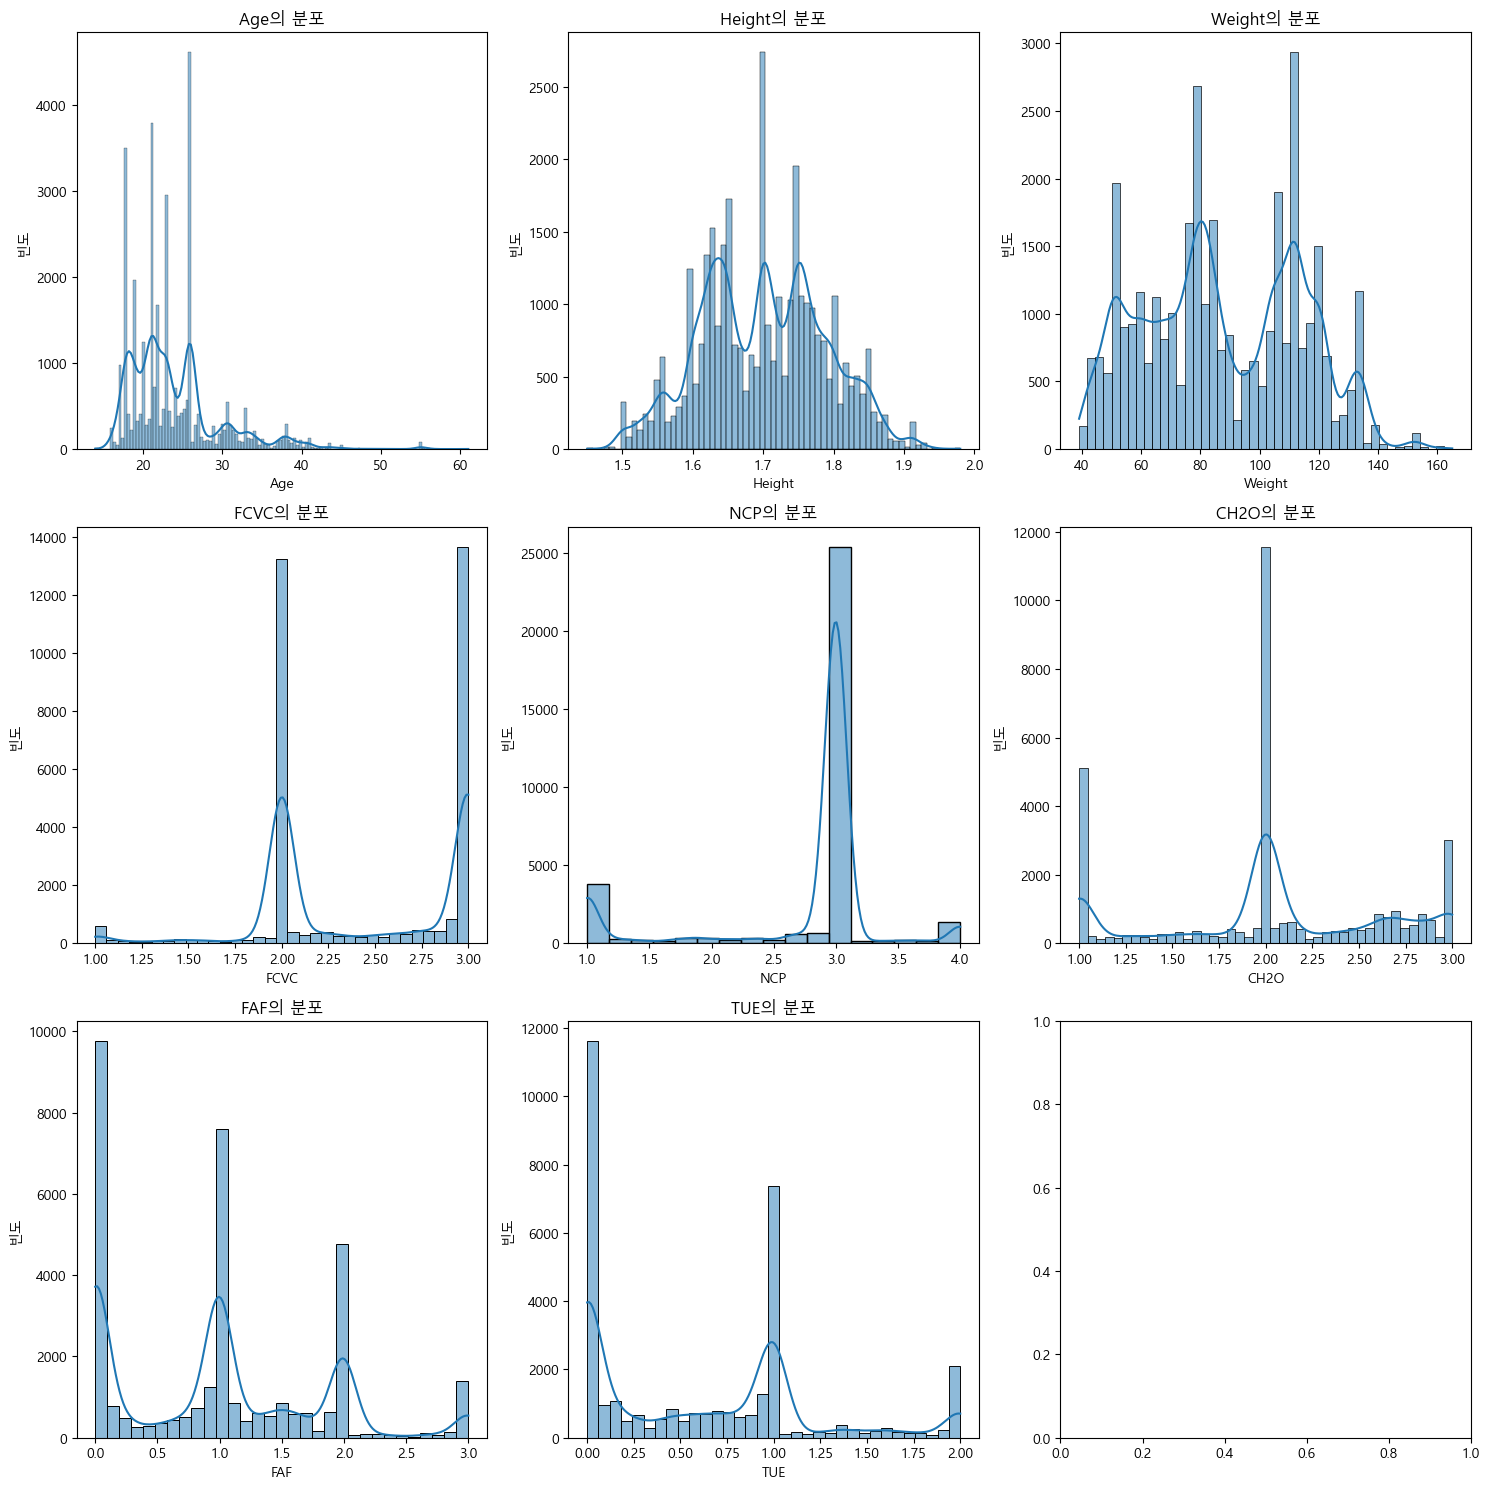

In [10]:
# 분포 시각화

# 수치형 변수 열 선택
numeric_columns = all_df.select_dtypes(include=['float64', 'int64']).columns

# 다중 플롯 설정
num_plots = len(numeric_columns) # 수치형의 len 값 : 8
num_cols = 3  # col = 3
num_rows = -(-num_plots // num_cols)  # -(-8 // 3) -> row = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

plt.rcParams['font.family'] = 'Malgun Gothic'
# 각 수치형 변수에 대해 시각화 수행
for i, column in enumerate(numeric_columns):
    row = i // num_cols # //  두 수를 나누고 정수만 반환 ex) 0 // 3 = 0 , 1 // 3 = 0 , 2 // 3 = 0
    col = i % num_cols # % 나머지 반환 ex) 0 % 3 = 0 , 1 % 3 = 1 , 2 % 3 = 2 , 3 % 3 = 1
    
    sns.histplot(all_df[column], kde=True, ax=axes[row, col])  
    axes[row, col].set_title(f'{column}의 분포')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')

plt.tight_layout()
plt.show()


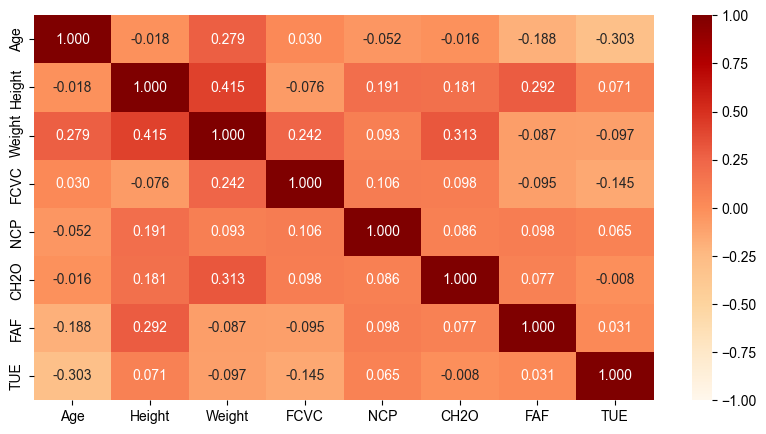

In [11]:
# 상관성 시각화

import seaborn as sns
plt.rcParams['font.family'] = 'Arial'
corr_numerical = all_df[numeric_columns].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_numerical, annot=True, cmap="OrRd", fmt='.3f', cbar=True, vmin=-1, vmax=1)
plt.show()

범주형 변수_시각화

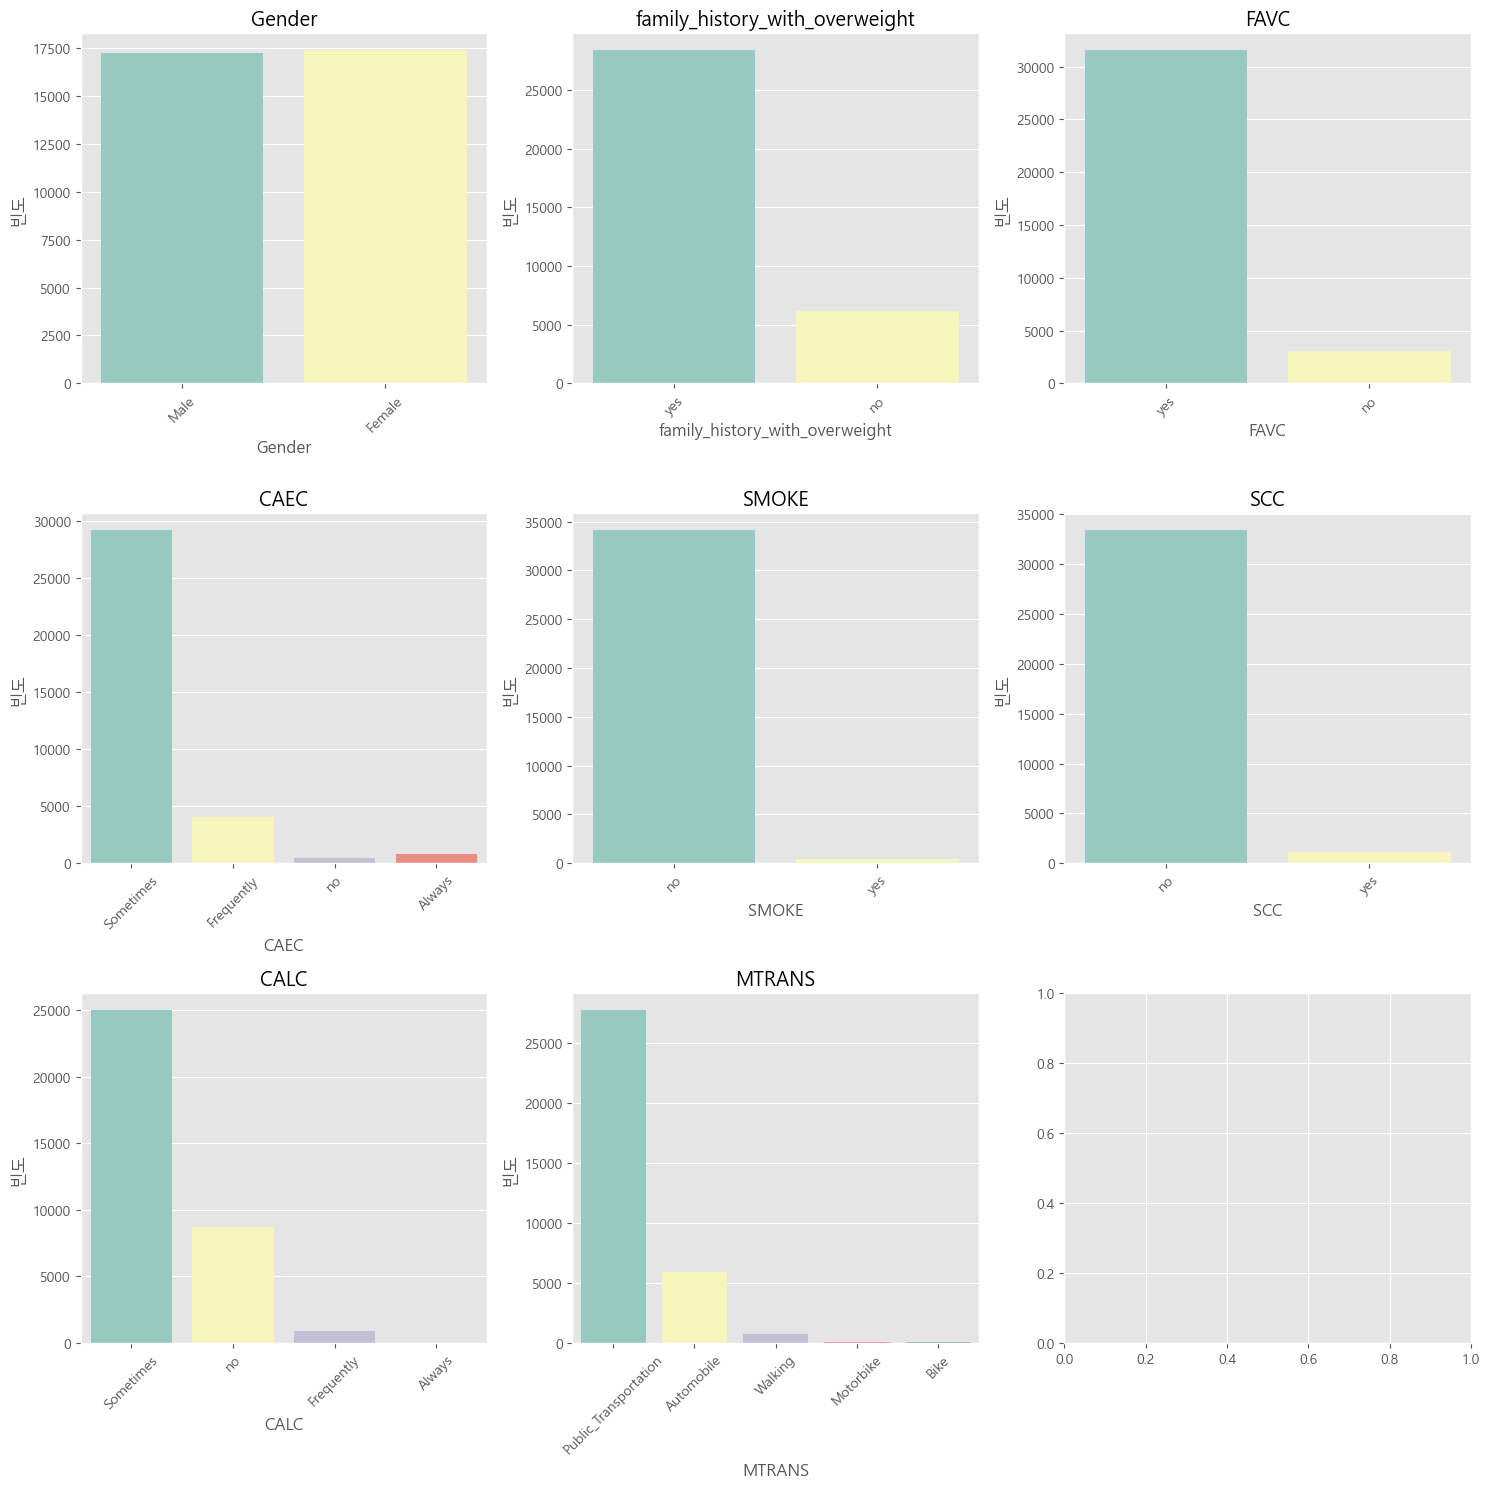

In [31]:
categorical_columns = all_df.select_dtypes(include=['object']).columns

# 다중 플롯 설정
num_plots = len(categorical_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# 스타일 설정 변경
plt.style.use('ggplot')

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.countplot(data=all_df, x=column, hue=column, ax=axes[row, col], palette='Set3')  # hue 매개변수를 통해 각 범주에 다른 색상 적용
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')
    axes[row, col].tick_params(axis='x', rotation=45) 

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.tight_layout()
plt.show()


* 인코딩

In [32]:
''' 
- 원-핫 인코딩: (명목척도 인 것)
gender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)

- 라벨 인코딩: (서열척도 인 것)
caec(4), calc(3)
'''

' \n- 원-핫 인코딩: (명목척도 인 것)\ngender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)\n\n- 라벨 인코딩: (서열척도 인 것)\ncaec(4), calc(3)\n'

In [33]:
# 원-핫 인코딩
all_df = pd.get_dummies(all_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE',
       'SCC', 'MTRANS'], drop_first=True)
all_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,Sometimes,2.763573,0.000000,0.976473,Sometimes,True,True,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,Frequently,2.000000,1.000000,1.000000,no,False,True,True,False,False,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,Sometimes,1.910378,0.866045,1.673584,no,False,True,True,False,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,Sometimes,1.674061,1.467863,0.780199,Sometimes,False,True,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,Sometimes,1.979848,1.967973,0.931721,Sometimes,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,Sometimes,1.000000,0.807076,0.778632,Sometimes,True,True,False,False,False,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,Sometimes,2.000000,0.000000,0.000000,Sometimes,False,False,True,False,False,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,Frequently,2.000000,1.949840,1.000000,Sometimes,False,False,True,False,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,Sometimes,2.000000,3.000000,2.000000,no,True,True,True,False,False,False,False,True,False


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
# 라벨 인코딩
le_cat = ['CAEC', 'CALC']

for cat in le_cat:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == 'object':
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

CAEC
CALC


In [36]:
all_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2,2.763573,0.000000,0.976473,2,True,True,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,1,2.000000,1.000000,1.000000,3,False,True,True,False,False,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,2,1.910378,0.866045,1.673584,3,False,True,True,False,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,2,1.674061,1.467863,0.780199,2,False,True,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,2,1.979848,1.967973,0.931721,2,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,2,1.000000,0.807076,0.778632,2,True,True,False,False,False,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,2,2.000000,0.000000,0.000000,2,False,False,True,False,False,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,1,2.000000,1.949840,1.000000,2,False,False,True,False,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,2,2.000000,3.000000,2.000000,3,True,True,True,False,False,False,False,True,False


In [37]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,23.886181,5.733207,14.00,20.000000,22.851747,26.000000,61.000000
Height,34598.0,1.699721,0.087895,1.45,1.631856,1.700000,1.761773,1.980000
Weight,34598.0,87.686451,26.273493,39.00,66.000000,84.000000,111.539494,165.057269
FCVC,34598.0,2.444704,0.532568,1.00,2.000000,2.392179,3.000000,3.000000
NCP,34598.0,2.757043,0.707610,1.00,3.000000,3.000000,3.000000,4.000000
CAEC,34598.0,1.846552,0.452257,0.00,2.000000,2.000000,2.000000,3.000000
CH2O,34598.0,2.030469,0.609566,1.00,1.784710,2.000000,2.550570,3.000000
FAF,34598.0,0.978861,0.839122,0.00,0.006892,1.000000,1.583832,3.000000
TUE,34598.0,0.614467,0.604475,0.00,0.000000,0.555591,1.000000,2.000000
CALC,34598.0,2.225360,0.474876,0.00,2.000000,2.000000,3.000000,3.000000


* 표준화

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 34598 non-null  float64
 1   Height                              34598 non-null  float64
 2   Weight                              34598 non-null  float64
 3   FCVC                                34598 non-null  float64
 4   NCP                                 34598 non-null  float64
 5   CAEC                                34598 non-null  int32  
 6   CH2O                                34598 non-null  float64
 7   FAF                                 34598 non-null  float64
 8   TUE                                 34598 non-null  float64
 9   CALC                                34598 non-null  int32  
 10  Gender_Male                         34598 non-null  bool   
 11  family_history_with_overweight_yes  34598

In [40]:
# 데이터프레임에서 수치형 변수 추출
numerical_columns = all_df.select_dtypes(include=['float64']).columns
numerical_columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [41]:
# StandardScaler 객체 생성
scaler = StandardScaler()
all_df[numerical_columns]= scaler.fit_transform(all_df[numerical_columns])
all_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,2,1.202683,-1.166547,0.598886,2,True,True,True,False,False,False,False,True,False
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,1,-0.049985,0.025192,0.637808,3,False,True,True,False,False,False,False,False,False
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,2,-0.197013,-0.134447,1.752153,3,False,True,True,False,False,False,False,True,False
3,-0.511666,0.125258,1.659050,1.042690,0.343353,2,-0.584699,0.582763,0.274179,2,False,True,True,False,False,False,False,True,False
4,1.352648,2.440044,0.232618,0.441189,-1.110191,2,-0.083045,1.178764,0.524850,2,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,-0.097389,0.246472,-0.367527,0.691996,0.343353,2,-1.690520,-0.204723,0.271587,2,True,True,False,False,False,False,False,True,False
34594,0.891978,-1.248327,-0.977671,1.042690,0.343353,2,-0.049985,-1.166547,-1.016544,2,False,False,True,False,False,False,False,True,False
34595,-0.165803,-1.298990,-1.648446,1.042690,-0.683018,1,-0.049985,1.157154,0.637808,2,False,False,True,False,False,False,False,True,False
34596,-0.503422,-0.907007,-1.320226,-0.835030,0.343353,2,-0.049985,2.408672,2.292160,3,True,True,True,False,False,False,False,True,False


In [42]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,8.379139e-17,1.000014,-1.724397,-0.677847,-0.180431,0.368703,6.473577
Height,34598.0,-5.770926e-17,1.000014,-2.841154,-0.772118,0.003179,0.705991,3.188832
Weight,34598.0,-2.330961e-17,1.000014,-1.853090,-0.825424,-0.140313,0.907888,2.944867
FCVC,34598.0,-2.873141e-16,1.000014,-2.712750,-0.835030,-0.098628,1.042690,1.042690
NCP,34598.0,6.074875e-16,1.000014,-2.483103,0.343353,0.343353,0.343353,1.756581
CAEC,34598.0,1.846552e+00,0.452257,0.000000,2.000000,2.000000,2.000000,3.000000
CH2O,34598.0,-7.136644e-16,1.000014,-1.690520,-0.403176,-0.049985,0.853244,1.590550
FAF,34598.0,-1.887360e-16,1.000014,-1.166547,-1.158333,0.025192,0.720968,2.408672
TUE,34598.0,-1.015560e-16,1.000014,-1.016544,-1.016544,-0.097401,0.637808,2.292160
CALC,34598.0,2.225360e+00,0.474876,0.000000,2.000000,2.000000,3.000000,3.000000


* 데이터 분할

In [43]:
all_df[:20758] # train_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,2,1.202683,-1.166547,0.598886,2,True,True,True,False,False,False,False,True,False
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,1,-0.049985,0.025192,0.637808,3,False,True,True,False,False,False,False,False,False
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,2,-0.197013,-0.134447,1.752153,3,False,True,True,False,False,False,False,True,False
3,-0.511666,0.125258,1.659050,1.042690,0.343353,2,-0.584699,0.582763,0.274179,2,False,True,True,False,False,False,False,True,False
4,1.352648,2.440044,0.232618,0.441189,-1.110191,2,-0.083045,1.178764,0.524850,2,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.218189,0.761205,1.008660,0.891692,0.343353,2,0.199063,0.419085,-0.691167,2,True,True,True,False,False,False,False,True,False
20754,-1.026697,0.116953,-1.434411,1.042690,1.756581,1,-1.690520,1.216932,0.637808,2,True,False,True,False,False,False,False,True,False
20755,-0.660226,1.363419,0.681078,-0.069264,0.343353,2,-0.049985,0.213535,0.966096,3,True,True,True,False,False,False,False,True,False
20756,1.738454,0.003179,-0.158578,0.425367,-1.110191,2,0.187627,-1.166547,0.594520,3,True,True,True,False,False,False,False,False,False


In [44]:
# 다시 학습데이터와 테스트 데이터로 되돌리기

train_X = all_df[:20758]
train_Y = train['NObeyesdad']

test_X = all_df[20758:]

In [45]:
# 목적변수 라벨인코딩
le = LabelEncoder()
le = le.fit(train_Y)

train_Y = le.transform(train_Y)
train_Y

array([6, 1, 0, ..., 3, 6, 3])

### 2. LightGBM 실행

In [52]:
import lightgbm as lgb

In [53]:
# lgb.__version__

'4.3.0'

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import StratifiedKFold


skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy=[]

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력필요
for train_index, test_index in skfold.split(train_X,train_Y): 
    X_train, X_val = train_X[train_index], train_X[test_index]
    y_train, y_val = train_Y[train_index], train_Y[test_index]
    
    X_train
#     # 학습 및 예측
#     dt_clf.fit(X_train, y_train)
#     print(id(dt_clf))
#     pred = dt_clf.predict(X_test)
    
#     n_iter+=1
#     accuracy = np.round(accuracy_score(y_test,pred),4)
#     train_size = X_train.shape[0]
#     test_size= X_test.shape[0]
#     print('\n#{0} 교차 검증 정확도 : {1}, 학습데이터크기: {2}, 검증데이터크기: {3}'.\
#         format(n_iter,accuracy, train_size,test_size))
#     print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
#     cv_accuracy.append(accuracy)

  
# # 개별 iteration별 정확도를 합하여 평균 정확도 출력
# print('\n## 교차 검증별 정확도:', np.round(cv_accuracy,4))
# print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


KeyError: "None of [Index([ 6575,  6579,  6580,  6586,  6597,  6598,  6620,  6626,  6627,  6630,\n       ...\n       20748, 20749, 20750, 20751, 20752, 20753, 20754, 20755, 20756, 20757],\n      dtype='int32', length=13838)] are in the [columns]"

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print(test_index)